<a href="https://colab.research.google.com/github/Rainbowpen/water_quality/blob/main/water_quality_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quaility
Kaggle water quality dataset web page: https://www.kaggle.com/adityakadiwal/water-potability/version/3

CSV file: https://www.kaggle.com/adityakadiwal/water-potability/download

most code copy from [this guys](https://www.kaggle.com/vishweshsalodkar/ann-on-glass-classification)

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
# Load dataset.
data = pd.read_csv('./water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


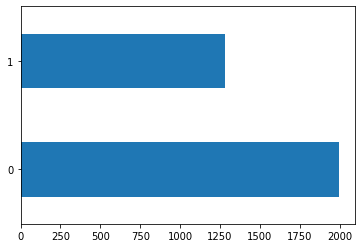

In [4]:
data.Potability.value_counts().plot(kind='barh')

In [5]:
(data.Potability.value_counts()[1] / len(data)) * 100

39.010989010989015

In [6]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

because some column is NaN, so we need to drop it

In [7]:
data.drop(['ph','Sulfate','Trihalomethanes'],axis=1,inplace=True) # drop column if have nan in it
#data = data.dropna() # drop single data if any column is nan

In [8]:
data.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0


In [9]:
x = data.iloc[:,:6]
y = data.iloc[:, -1]

In [10]:
x.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5678) # train:test is 8:2 and random_state is seed you can put any int number you want.

In [13]:
x_train

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
2511,218.019530,15120.924716,3.124833,498.933519,14.836624,3.226035
1183,188.391725,20567.145930,7.443243,656.924128,16.274831,4.401628
213,186.918245,11642.727541,5.890684,363.506344,10.740146,3.462764
2564,192.041369,14704.906246,7.905769,429.766223,15.018138,5.075214
1371,218.394054,23774.258279,6.414852,413.004844,13.450580,5.168298
...,...,...,...,...,...,...
319,119.841905,26618.059637,6.105573,379.725182,10.899926,4.888061
2962,217.394778,3413.081633,5.670027,615.611167,14.926751,2.649424
2366,201.439065,32571.054518,9.959355,338.497815,13.261538,3.333243
2199,229.725348,22444.559412,5.702175,389.030889,15.501543,3.851154


In [14]:
x_test

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
58,157.801194,16963.625012,8.335619,360.995994,12.823861,4.405386
128,228.300860,16600.392747,6.094001,504.050539,15.035047,3.809842
1672,137.253427,20593.933718,3.961111,520.410505,19.249550,3.302419
2243,205.482940,23268.243081,9.035769,371.403475,16.863668,2.686069
269,155.357557,15737.468938,7.251979,463.389256,17.854470,3.652134
...,...,...,...,...,...,...
2135,184.020029,13361.226016,9.258656,467.444154,19.581926,4.411058
1887,188.368741,26402.703957,4.074141,325.001116,16.917994,3.029700
2281,200.710330,26744.231526,6.833360,363.950991,14.144772,4.829754
317,77.459586,39227.619457,8.517986,410.856114,14.326889,3.309580


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
x_test = sc.fit_transform(x_test)

In [16]:
x_test

array([[-1.18690540e+00, -5.92843314e-01,  7.55602673e-01,
        -8.34067154e-01, -4.03115800e-01,  5.48115491e-01],
       [ 1.00036966e+00, -6.33401330e-01, -6.41176533e-01,
         9.55719972e-01,  2.68575007e-01, -2.42483408e-01],
       [-1.82440654e+00, -1.87488034e-01, -1.97020588e+00,
         1.16040314e+00,  1.54881255e+00, -9.16098670e-01],
       ...,
       [ 1.44364510e-01,  4.99245766e-01, -1.80472586e-01,
        -7.97096540e-01, -1.86324476e-03,  1.11147385e+00],
       [-3.67952987e+00,  1.89312370e+00,  8.69238118e-01,
        -2.10256144e-01,  5.34582035e-02, -9.06592129e-01],
       [ 2.60690908e+00,  5.10965814e-01, -6.18273420e-01,
        -1.62708412e+00,  4.31554638e-01, -7.80407662e-01]])

In [17]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 3)

Epoch 1/3
82/82 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6130
Epoch 2/3
82/82 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6130
Epoch 3/3
82/82 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6130


In [24]:
test_ans = ann.predict_classes(x_test)
correct_cnt = 0
for cnt, i in enumerate(test_ans):
    if i == y_test.iloc[cnt]:
        correct_cnt += 1

# print test data accuracy
print(f"Accuracy is {(correct_cnt / len(y_test) * 100)} %")

# print first ten guess and correct ans
for i in range(10):
    print(f"{test_ans[i][0]} : {y_test.iloc[i]}")

Accuracy is 59.756097560975604 %
0 : 0
0 : 0
0 : 0
0 : 0
0 : 1
0 : 1
0 : 1
0 : 0
0 : 1
0 : 0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
